In [1]:
import os
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import gpxpy
from pyproj import Transformer
from pyproj import CRS
import GPX_functions
import cartopy.mpl.gridliner as gridliner
import matplotlib.ticker as mticker
import cartopy.mpl.ticker as cartopyticker
lon_formatter = cartopyticker.LongitudeFormatter()
lat_formatter = cartopyticker.LatitudeFormatter()
plt.rcParams.update({'font.size': 12})
figdir = "../images/"

In [19]:
gpxfile = "/data/GPX/GranCanaria/BarrancoNegro_2017_12_28_10_27_37_Trekking.gpx"
lon, lat, ele, t = GPX_functions.read_gpx(gpxfile)
coordinates = [lon.min(), lon.max(), lat.min(), lat.max()]
deltalon = lon.max() - lon.min()
deltalat = lat.max() - lat.min()
if deltalon > deltalat:
    coordinates = [lon.min(), lon.max(), lat.mean() - 0.5 * deltalon, lat.mean() + 0.5 * deltalon]
else:
    coordinates = [lon.mean() - 0.5 * deltalat, lon.mean() + 0.5 * deltalat, lat.min(), lat.max()]

In [20]:
# Start projection
myproj = cartopy.crs.Mercator(central_longitude=0.5 * (coordinates[0] + coordinates[1]), 
                     min_latitude=coordinates[2], max_latitude=coordinates[3], 
                     globe=None, latitude_true_scale=None)

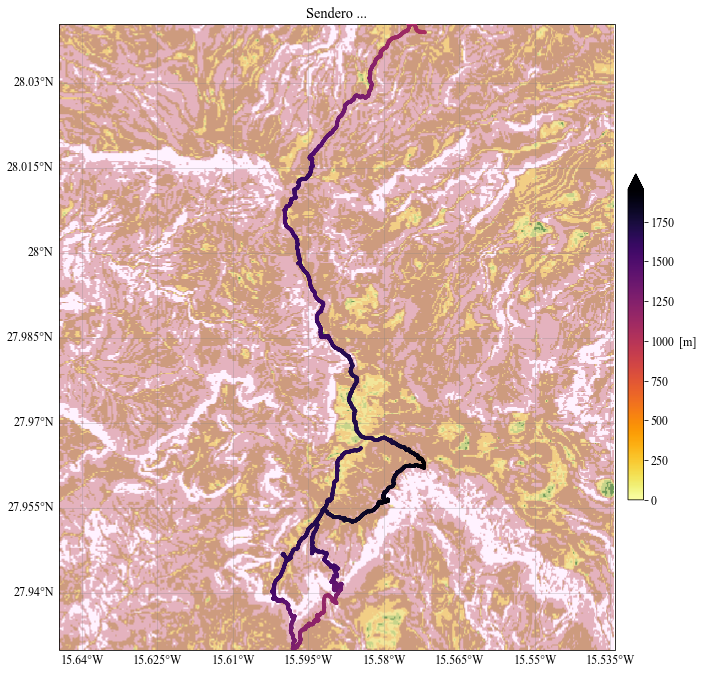

In [24]:
fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection=myproj)

#ax.coastlines()
scat = ax.scatter(lon, lat, s=6, c=ele, 
                  cmap=plt.cm.inferno_r, zorder=5,
                  transform=ccrs.PlateCarree())

cb = plt.colorbar(scat, extend="max", shrink=.5, pad=0.02)
cb.set_label("[m]", rotation=0, ha="left")

ax.add_wms(wms='http://servicios.idee.es/wms-inspire/mdt?',
               layers=['Pendientes'],
               transform=myproj)
ax.set_extent(coordinates)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=.5, color='gray', alpha=0.5, linestyle='-')
gl.top_labels = False
gl.right_labels = False


plt.title("Sendero ...")
#plt.savefig(os.path.join(figdir, "contaminants.png"), dpi=300, bbox_inches="tight",
#            facecolor="w", transparent=False)
plt.show()
plt.close()

In [22]:
https://matplotlib.org/stable/gallery/images_contours_and_fields/shading_example.html

0.1104920000000007